In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [2]:
plt.rcParams['figure.figsize']=[18,12]

In [3]:
df=pd.read_csv(r'C:\Users\SHUBHAM SHARMA\Desktop\SVM PROJECT\Market Positioning of Mobile\Dataset\Dataset\Mobile_data.csv')

In [4]:
df.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


In [5]:
df.shape

(2000, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [7]:
df.isna().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

# 4. Data Analysis and preparation

In [8]:
df.dtypes

battery_power      int64
clock_speed      float64
fc                 int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
price_range        int64
dtype: object

In [9]:
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


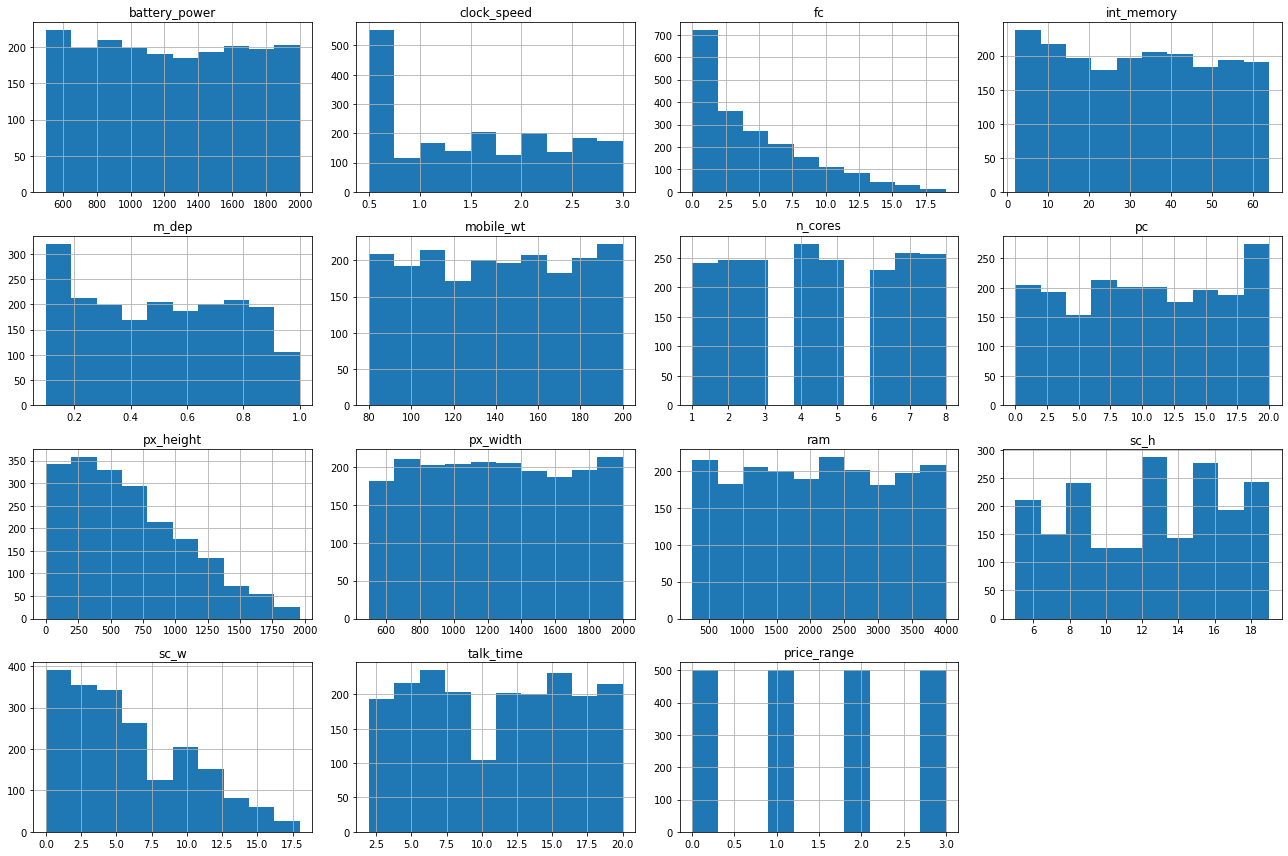

In [10]:
df.hist()
plt.tight_layout()
plt.show()

In [11]:
df_feature=df.drop('price_range',axis=1)
df_target=df['price_range']

In [12]:
class_frequency=df_target.value_counts()
class_frequency

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

<AxesSubplot:xlabel='price_range', ylabel='count'>

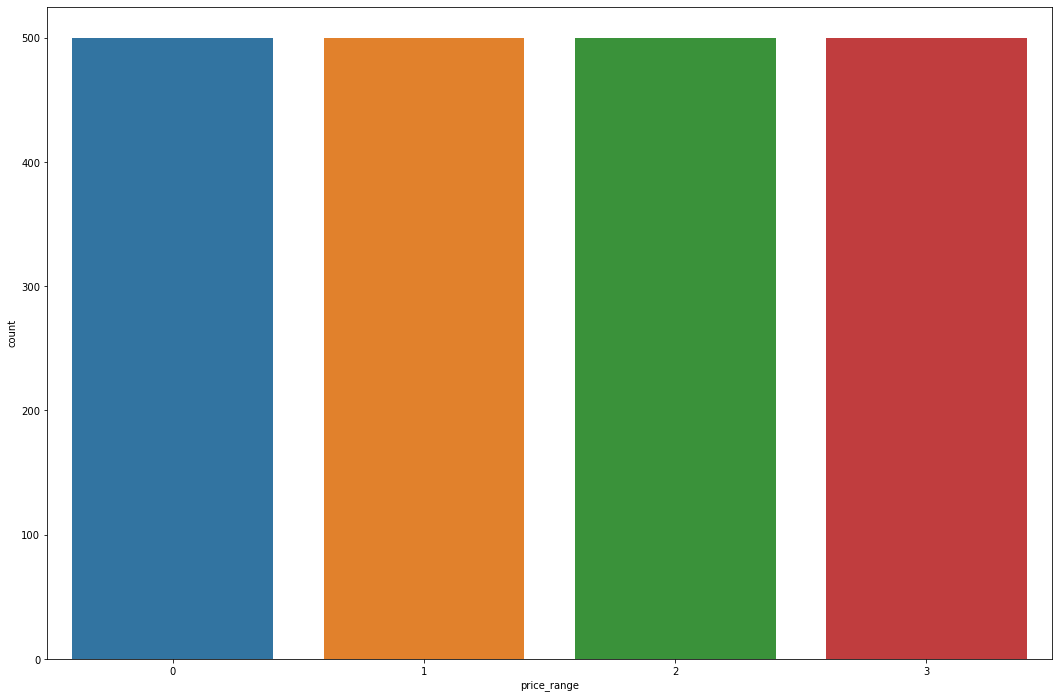

In [13]:
sns.countplot(x=df_target)
#plt.text(x=-.05,y=df_target.price_range.value_counts()[0], s=str(()))

In [14]:
price_group=df.groupby('price_range')['ram'].mean()

In [15]:
price_group

price_range
0     785.314
1    1679.490
2    2582.816
3    3449.232
Name: ram, dtype: float64

C:\Users\SHUBHAM SHARMA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='ram'>

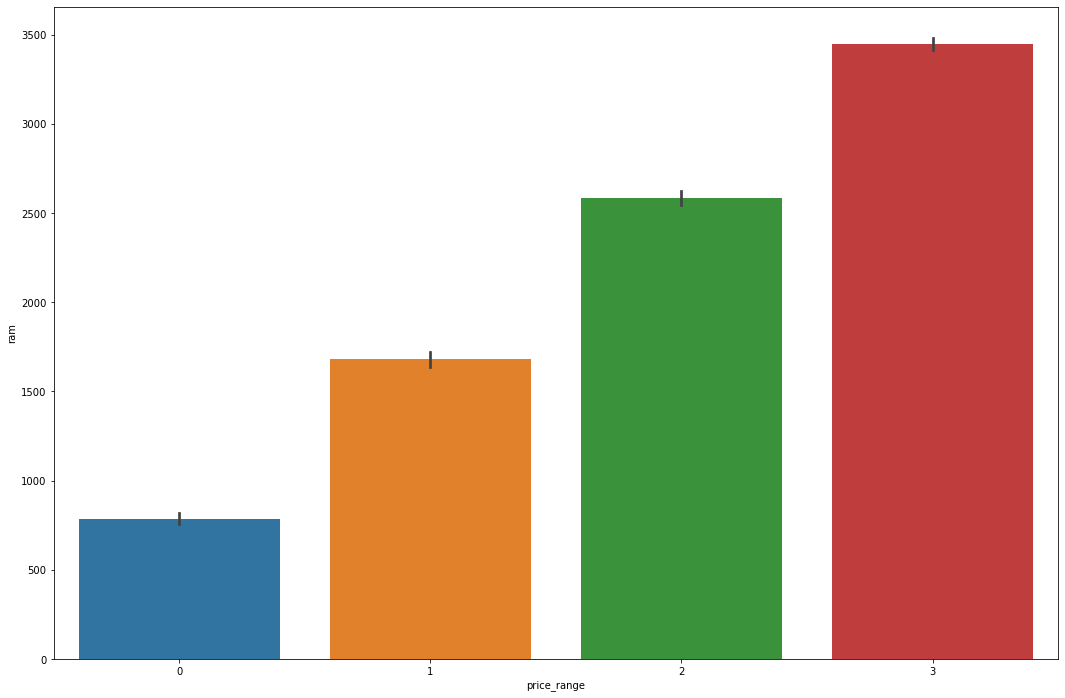

In [16]:
sns.barplot('price_range','ram',data=df)

In [17]:
#corr
corr=df.corr()

<AxesSubplot:>

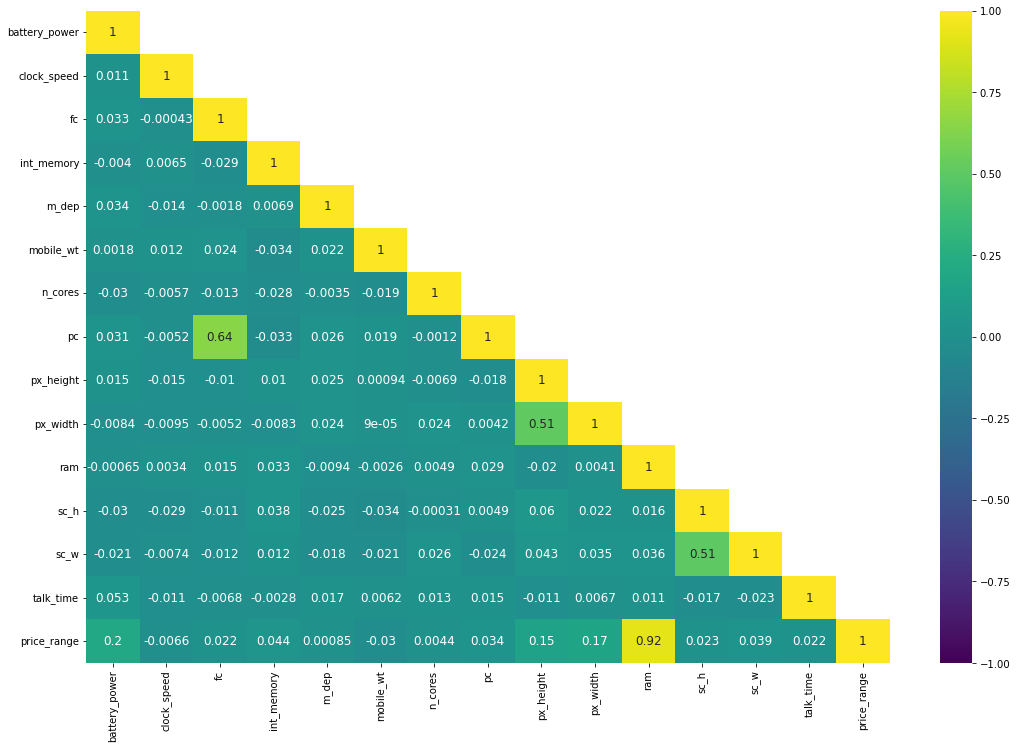

In [18]:
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask,k=1)]=True
sns.heatmap(corr,cmap='viridis',vmax=1.0,vmin=-1.0,annot=True,annot_kws={'size':12},mask=mask)

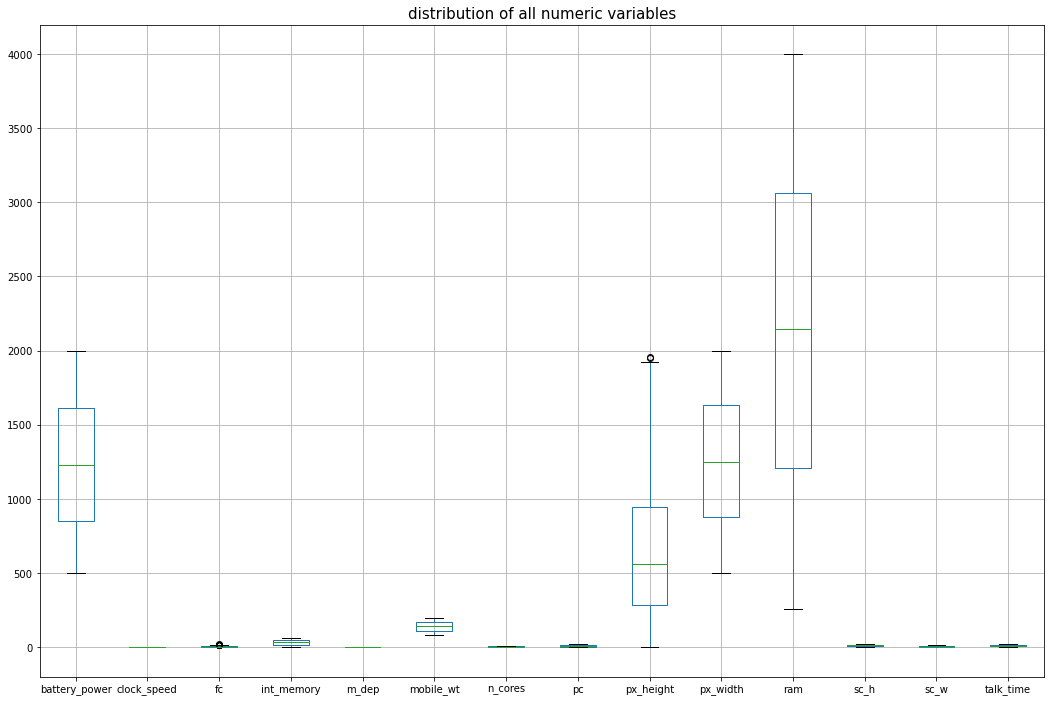

In [19]:
df_feature.boxplot()
plt.title('distribution of all numeric variables',fontsize=15)
#plt.xticks(rotation='verticle',fontsize=15)
plt.show()

<AxesSubplot:>

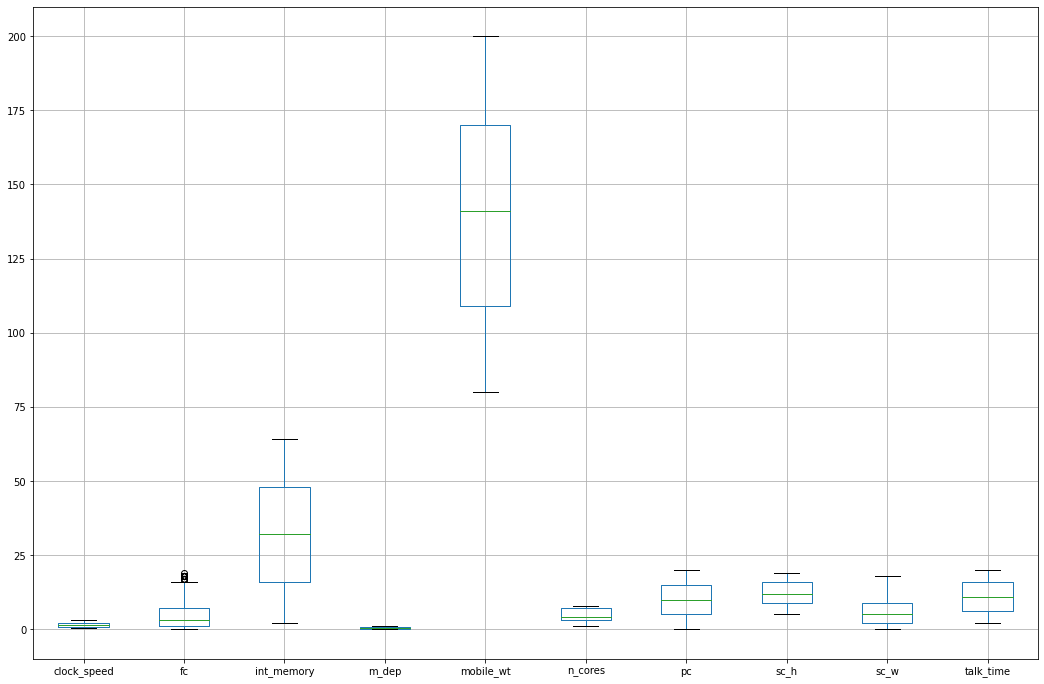

In [20]:
df_feature.drop(['battery_power','px_height','px_width','ram'],axis=1).boxplot()

C:\Users\SHUBHAM SHARMA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fc'>

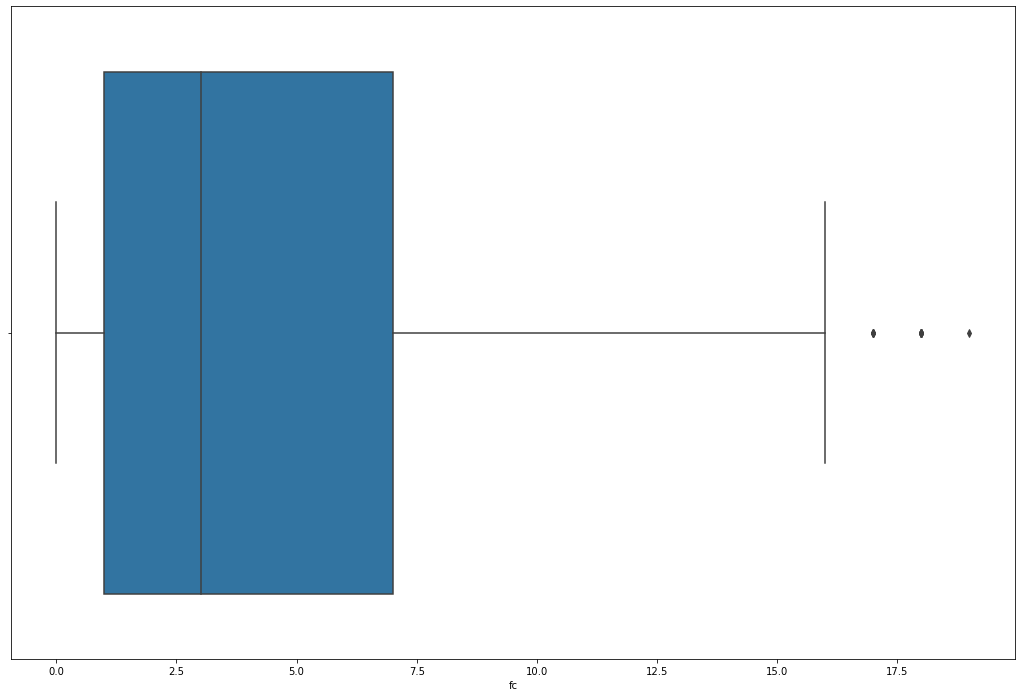

In [21]:
sns.boxplot(df_feature['fc'])
# check for separate columns

In [22]:
q1=df_feature.quantile(.25)
q3=df_feature.quantile(.75)
iqr=q3-q1
print(iqr)

battery_power     763.50
clock_speed         1.50
fc                  6.00
int_memory         32.00
m_dep               0.60
mobile_wt          61.00
n_cores             4.00
pc                 10.00
px_height         664.50
px_width          758.25
ram              1857.00
sc_h                7.00
sc_w                7.00
talk_time          10.00
dtype: float64


In [23]:
maxx=(q3+iqr*1.5)
minn=(q1-iqr*1.5)
maxx

battery_power    2760.500
clock_speed         4.450
fc                 16.000
int_memory         96.000
m_dep               1.700
mobile_wt         261.500
n_cores            13.000
pc                 30.000
px_height        1944.000
px_width         2770.375
ram              5850.000
sc_h               26.500
sc_w               19.500
talk_time          31.000
dtype: float64

In [24]:
df=df[~((df<(q1-iqr*1.5))|(df>(q3+iqr*1.5))).any(axis=1)]
df=df.reset_index(drop=True)

C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_11496/1182473317.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df[~((df<(q1-iqr*1.5))|(df>(q3+iqr*1.5))).any(axis=1)]


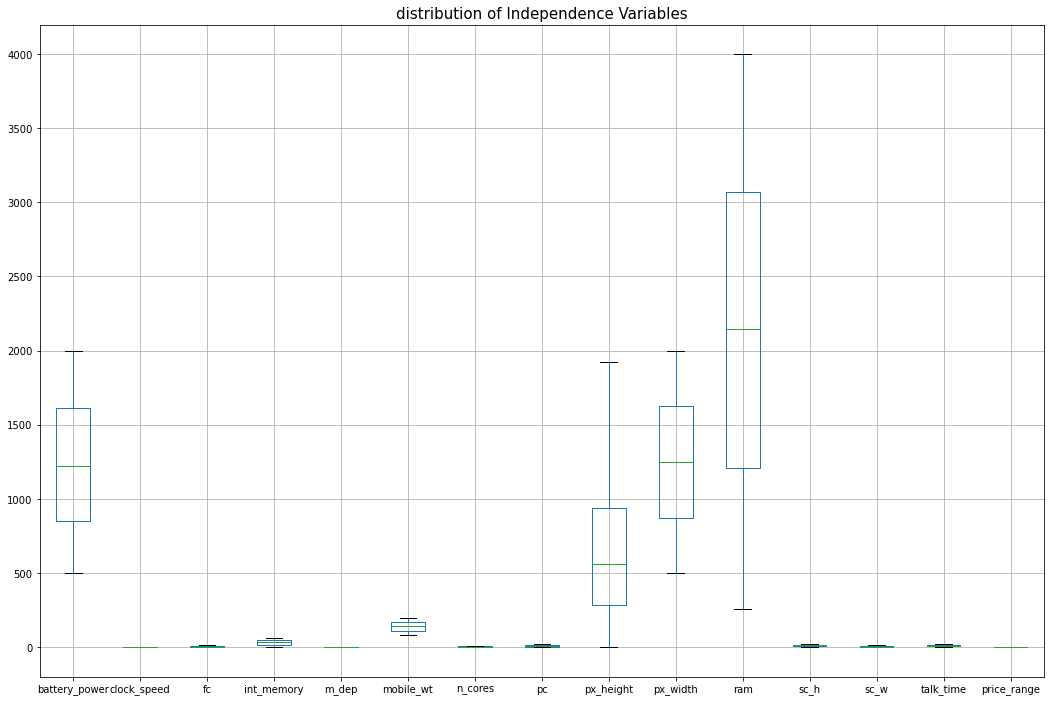

In [25]:
df.boxplot()
plt.title('distribution of Independence Variables',fontsize=15)

plt.show()

In [26]:
df.shape


(1980, 15)

In [27]:
# y=df.price_range
# x=df.drop('price_range',axis=1)
#df1=df.drop('price_range',axis=1)
x=df.drop('price_range',axis=1)
y=df['price_range']


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=105)

In [29]:
from sklearn.preprocessing import StandardScaler
mm=StandardScaler()
v=mm.fit_transform(x_train)
v1=mm.fit_transform(x_test)


In [30]:
x=pd.DataFrame(v1,columns=x.columns)
x

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,0.492941,0.199210,0.378762,0.329255,-0.680193,0.711270,-0.260096,1.343439,-0.932583,-0.687475,-1.462179,0.399135,-0.469657,-0.236245
1,-0.375474,-0.049645,-0.581684,-0.776640,-0.335748,0.767123,-0.260096,0.668452,-0.277057,0.015201,-1.541393,-0.799481,0.211881,0.877481
2,0.892319,0.199210,-0.581684,-0.002513,1.730927,1.465276,1.495553,-0.850267,-1.105697,-0.706213,-1.082686,0.159412,0.893419,0.134997
3,-0.078263,-1.293924,-0.581684,-0.666050,-0.335748,0.599566,1.495553,-1.019013,-1.258037,-1.537713,0.248301,1.118305,0.439060,-0.793107
4,-1.652555,-0.920640,0.618873,0.495139,-0.680193,-1.243560,-1.576833,-0.344027,-1.324975,-1.600954,-1.315724,0.159412,1.347777,-0.793107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,1.008417,-0.049645,-1.061907,0.550434,-0.680193,-0.824667,-1.137921,-1.694000,-0.154723,-1.432312,0.940046,-0.080311,-0.242478,-0.236245
590,-1.462154,-0.422929,-1.061907,-0.057808,-0.335748,0.068969,0.617728,-1.525253,-0.891035,-1.713382,-0.252776,-0.559758,-1.378374,-0.978728
591,1.103618,0.945777,-0.821795,0.052781,-0.335748,-1.522821,0.178816,-0.006534,0.230745,1.174616,1.109528,1.118305,-0.015298,0.506239
592,-0.633212,-0.920640,-1.061907,-0.610756,-1.369085,1.632833,-1.137921,0.499706,1.299437,-0.048040,0.691349,0.878581,1.347777,-1.721212


In [58]:
# df_num=df1.apply(lambda rec:(rec-rec.mean())/rec.std())
# df_num.head()

In [31]:
def get_test_report(model):

    test_pred = model.predict(x_test)
    return(print(classification_report(y_test, test_pred)))

In [32]:
def plot_confusion_matrix(model):
    y_pred=model.predict(x_test)
    cm=confusion_matrix(y_test,y_pred)
    conf_matrix=pd.DataFrame(data=cm,columns=['p:0','p:1','p:2','p:3'],\
                            index=['a:0','a:1','a:2','a:3'])
    sns.heatmap(conf_matrix,annot=True,fmt='d',cbar=False,linewidths=.1,annot_kws={'size':25})
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

# KNN

In [73]:
knn_classification=KNeighborsClassifier(n_neighbors=3)
knn_model=knn_classification.fit(x_train,y_train)

In [74]:
get_test_report(knn_model)

              precision    recall  f1-score   support

           0       0.98      0.93      0.96       167
           1       0.84      0.93      0.88       141
           2       0.90      0.83      0.86       153
           3       0.91      0.95      0.93       133

    accuracy                           0.91       594
   macro avg       0.91      0.91      0.91       594
weighted avg       0.91      0.91      0.91       594



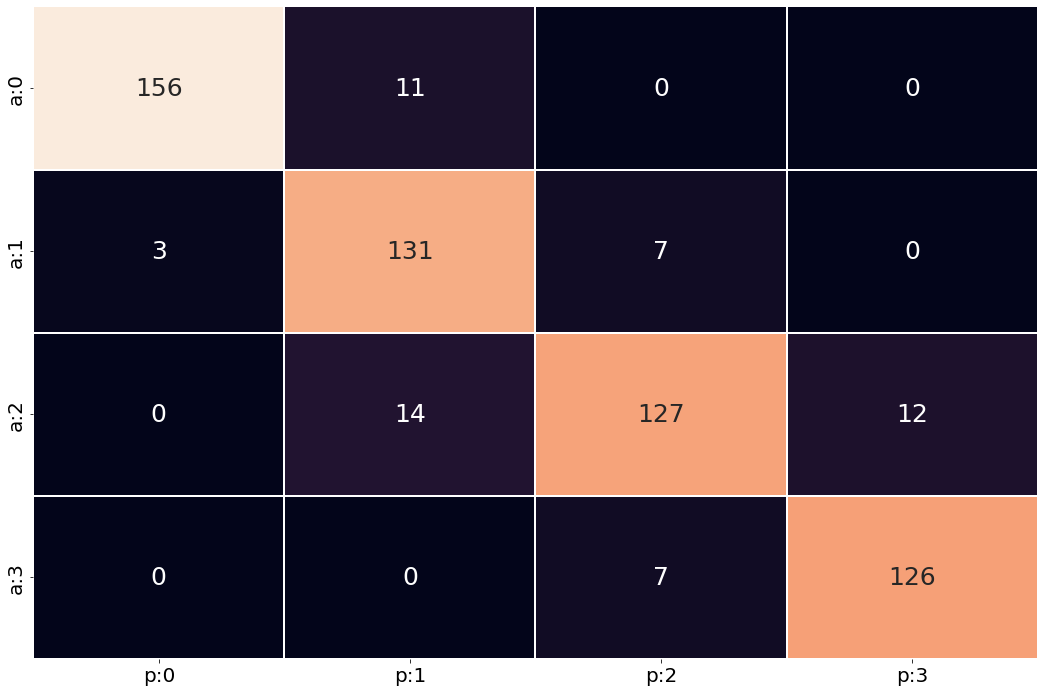

In [75]:
plot_confusion_matrix(knn_model)

# Knn using Grid Search CV

In [80]:
tunned_param={'n_neighbors':np.arange(1,25,2),
             'metric':['hamming','euclidean','manhattan','Chebyshev']}
knn_classification=KNeighborsClassifier()
knn_grid=GridSearchCV(estimator=knn_classification,
                     param_grid=tunned_param,
                     cv=5,
                     scoring='accuracy'
                     )
knn_grid.fit(x_train,y_train)
print('the result of grid search:',knn_grid.best_params_)

the result of grid search: {'metric': 'manhattan', 'n_neighbors': 13}


C:\Users\SHUBHAM SHARMA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SHUBHAM SHARMA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SHUBHAM SHARMA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 207, in fit
    return self._fit(X, y)
  File "C:\Users\SHUBHAM SHARMA\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 446, in _fit
    self._check_algorithm_metric()
  File

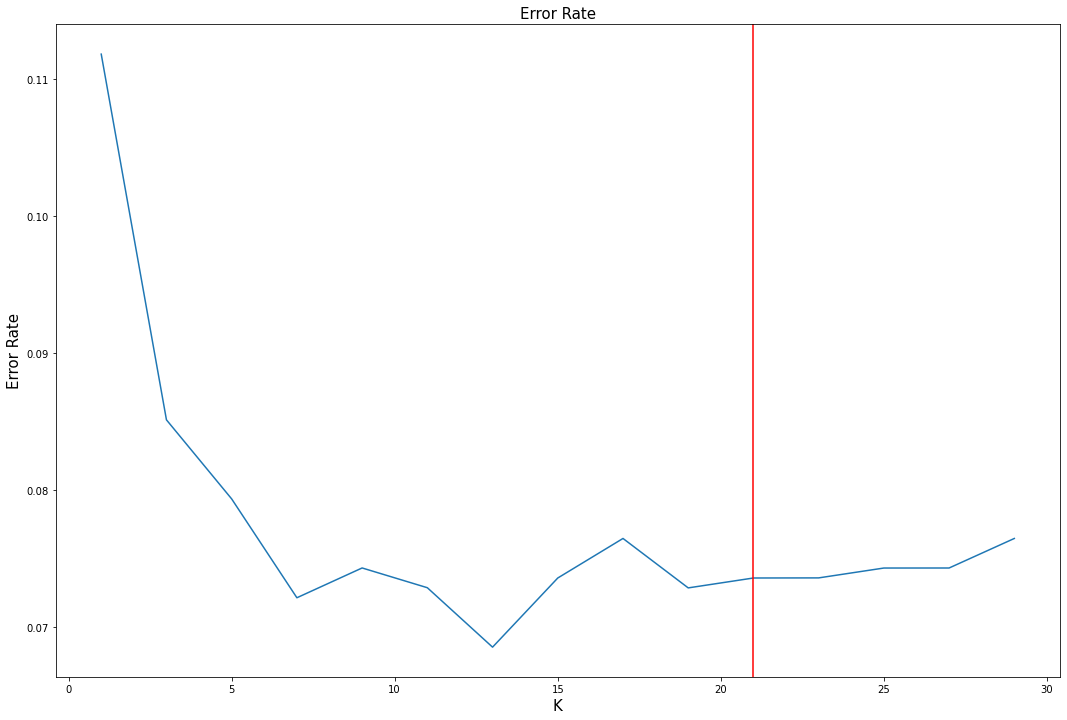

In [82]:
error_rate = []

# use for loop to build a knn model for each K
for i in np.arange(1,30,2):
    
    # setup a knn classifier with k neighbors
    # use the 'euclidean' metric 
    knn = KNeighborsClassifier(i, metric = 'manhattan')
   
    # fit the model using 'cross_val_score'
    # pass the knn model as 'estimator'
    # use 5-fold cross validation
    score = cross_val_score(knn, x_train, y_train, cv = 5)
    
    # calculate the mean score
    score = score.mean()
    
    # compute error rate 
    error_rate.append(1 - score)

# plot the error_rate for different values of K 
plt.plot(range(1,30,2), error_rate)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Error Rate', fontsize = 15)
plt.xlabel('K', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)

# set the x-axis labels
#plt.xticks(np.arange(1, 30, step = 2))

# plot a vertical line across the minimum error rate
plt.axvline(x = 21, color = 'red')

# display the plot
plt.show()

In [84]:
knn_classification=KNeighborsClassifier(n_neighbors=13,metric='manhattan')
knn_model1=knn_classification.fit(x_train,y_train)

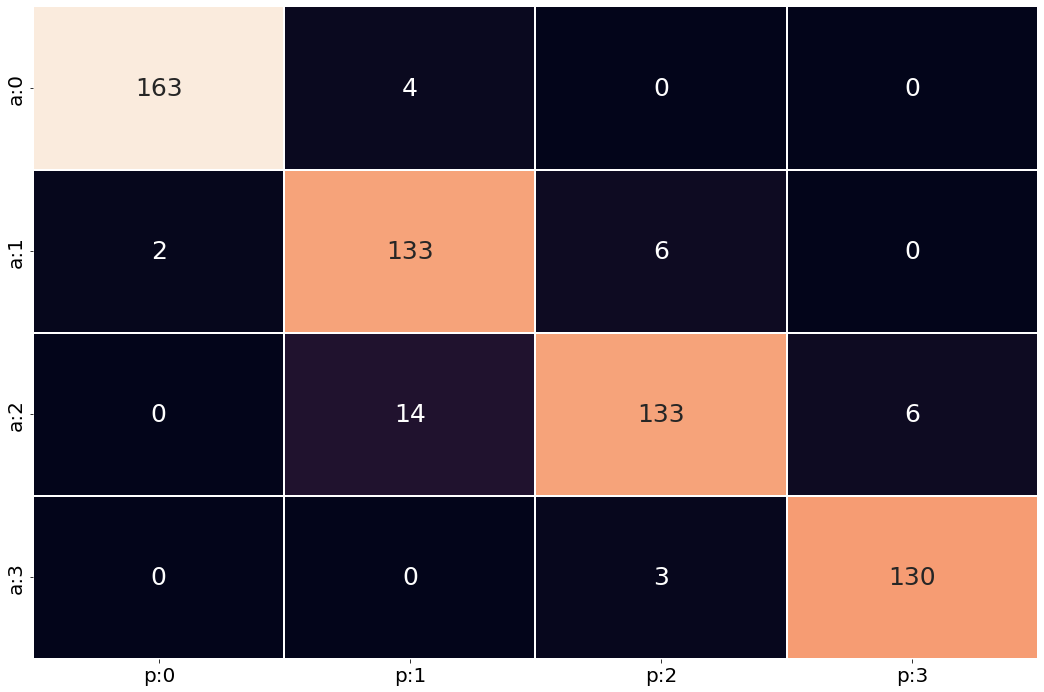

In [85]:
plot_confusion_matrix(knn_model1)

In [86]:
get_test_report(knn_model1)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       167
           1       0.88      0.94      0.91       141
           2       0.94      0.87      0.90       153
           3       0.96      0.98      0.97       133

    accuracy                           0.94       594
   macro avg       0.94      0.94      0.94       594
weighted avg       0.94      0.94      0.94       594



# Naive Bays

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
gnb=GaussianNB()
GNB=OneVsRestClassifier(gnb)
GNB.fit(v,y_train)

OneVsRestClassifier(estimator=GaussianNB())

In [40]:
y_pred_gnb=GNB.predict(v1)

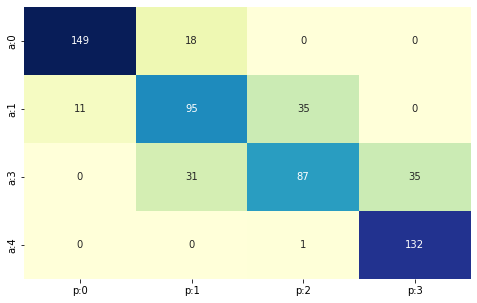

In [41]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_gnb)
conf_matrix=pd.DataFrame(data=cm,columns=['p:0','p:1','p:2','p:3'],index=['a:0','a:1','a:3','a:4'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='YlGnBu',cbar=False)

plt.show()

In [42]:
from sklearn.metrics import classification_report
result=classification_report(y_test,y_pred_gnb)
print(result)

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       167
           1       0.66      0.67      0.67       141
           2       0.71      0.57      0.63       153
           3       0.79      0.99      0.88       133

    accuracy                           0.78       594
   macro avg       0.77      0.78      0.77       594
weighted avg       0.78      0.78      0.77       594

